In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df2022=pd.read_csv('2022 Overtakes Data - Sheet1.csv',delimiter=',')
df2021=pd.read_csv('2021 Overtakes Data - Sheet1.csv',delimiter=',')
df2020=pd.read_csv('2020 Overtakes  - Sheet1.csv',delimiter=',')
df2019=pd.read_csv('2019 Overtakes - Sheet1.csv',delimiter=',')
df2018=pd.read_csv('_2018 Overtakes - Sheet1.csv',delimiter=',')
df2017=pd.read_csv('2017 Overtakes - Sheet1.csv',delimiter=',')
df2016=pd.read_csv('2016 Overtakes - Sheet1.csv',delimiter=',')
df2015=pd.read_csv('2015 Overtakes  - Sheet1.csv',delimiter=',')
df2014=pd.read_csv('_2014 Overtakes - Sheet1.csv',delimiter=',')

carreras_2014=df2014['Race'].unique()
carreras_2015=df2015['Race'].unique()
carreras_2016=df2016['Race'].unique()
carreras_2017=df2017['Race'].unique()
carreras_2018=df2018['Race'].unique()
carreras_2019=df2019['Race'].unique()
carreras_2021=df2021['Race'].unique()
carreras_2022=df2022['Race'].unique()

a=list(df2015['Overtaker'].value_counts())
b=list(df2016['Overtaker'].value_counts())
c=list(df2017['Overtaker'].value_counts())
d=list(df2018['Overtaker'].value_counts())
e=list(df2019['Overtaker'].value_counts())
f=list(df2014['Overtaker'].value_counts())
g=list(df2021['Overtaker'].value_counts())
h=list(df2022['Overtaker'].value_counts())
dic={"2015":a[0],"2016":b[0],"2017":c[0],"2018":d[0],"2019":e[0],"2014":f[0],"2021":g[0],"2022":h[0]}
s=pd.Series(dic)

df2021.head()


,Race,Lap,Position,Overtaker,Overtaken,Live,Turn
0,Bahrain,4,5,Norris,Gasly,Yes,4
1,Bahrain,4,6,Ricciardo,Gasly,Yes,6
2,Bahrain,4,10,Giovinazzi,Raikkonen,NaN,NaN
3,Bahrain,4,14,Russell,Tsunoda,NaN,NaN
4,Bahrain,4,15,Perez,Tsunoda,NaN,10


In [89]:
!pip install python-louvain


  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9407 sha256=855ac5605cd2674eaeb00450c308ea7b988a4fee1b327a7f088982cc8e2d509a
  Stored in directory: c:\users\jmurd\appdata\local\pip\cache\wheels\4d\7c\b6\79b198e4ec43f915fbdf967953d48b89a18893b12aa9df0ae2
Successfully built python-louvain


In [7]:
import networkx as nx

# Crear un grafo dirigido
DG = nx.DiGraph()

# Añadir los nodos al grafo
df=df2019
nodos = df['Overtaker'].unique()
DG.add_nodes_from(nodos)

# Añadir las aristas al grafo

for index, row in df.iterrows():
        adelantador = row['Overtaker']
        adelantado = row['Overtaken']
        if DG.has_edge(adelantador, adelantado):
            # Si la arista ya existe, se incrementa el peso de la misma
            DG[adelantador][adelantado]['weight'] += 1
        else:
            # Si la arista no existe, se crea una nueva arista con peso 1
            DG.add_edge(adelantador, adelantado, weight=1)

# Convertir el grafo dirigido en un grafo no dirigido
G = DG.to_undirected()

# Aplicar el algoritmo de Louvain
import community
particiones = community.best_partition(G)

# Imprimir las particiones
for piloto, particion in particiones.items():
    print(f'{piloto} está en la partición {particion}')


Gasly está en la partición 1
Ricciardo está en la partición 1
Perez está en la partición 0
Magnussen está en la partición 2
Hulkenberg está en la partición 2
Raikkonen está en la partición 2
Norris está en la partición 0
Grosjean está en la partición 0
Verstappen está en la partición 1
Kvyat está en la partición 2
Leclerc está en la partición 1
Hamilton está en la partición 1
Russell está en la partición 0
Kubica está en la partición 2
Albon está en la partición 0
Bottas está en la partición 1
Vettel está en la partición 1
Sainz está en la partición 2
Giovinazzi está en la partición 0
Stroll está en la partición 2


In [110]:
!pip install networkx


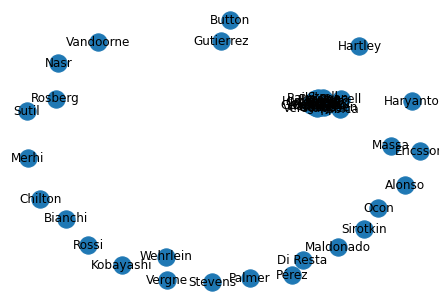

<Figure size 57600x57600 with 0 Axes>

In [119]:
pilotos = list(G.nodes())
dataframes = [df2019]

import networkx as nx
import matplotlib.pyplot as plt

# Crear el grafo dirigido
G = nx.DiGraph()

# Añadir nodos al grafo
for piloto in pilotos:
    G.add_node(piloto)

# Añadir aristas al grafo
for i in range(len(dataframes)):
    for j in range(len(dataframes[i])):
        adelantador = dataframes[i]['Overtaker'][j]
        adelantado = dataframes[i]['Overtakee'][j]
        G.add_edge(adelantador, adelantado)

# Dibujar el grafo
nx.draw(G, with_labels=True)
plt.figure(figsize=(800, 800))
plt.show()


In [ ]:
#ADELANTAMIENTOS AÑO 2021
import networkx as nx
import matplotlib.pyplot as plt


G = nx.DiGraph()
pilotos_2021 = carrera['Overtaker'].unique()
G.add_nodes_from(pilotos_2021)

for index, row in df2021.iterrows():
    G.add_edge(row['Overtaker'], row['Overtaken'])


plt.figure(figsize=(12, 8))


pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=pos, with_labels=True, node_color='lightblue', edge_color='gray', font_size=10, font_weight='bold')
centrality = nx.betweenness_centrality(G)

for node, centrality_value in centrality.items():
    print("El nodo {} tiene una centralidad intermedia de {}".format(node, centrality_value))

plt.show()


Centralidad de los nodos:
El nodo Gasly tiene una centralidad intermedia de 0.005494505494505495
El nodo Ricciardo tiene una centralidad intermedia de 0.0
El nodo Perez tiene una centralidad intermedia de 0.0
El nodo Magnussen tiene una centralidad intermedia de 0.0
El nodo Hulkenberg tiene una centralidad intermedia de 0.0
El nodo Raikkonen tiene una centralidad intermedia de 0.0
El nodo Norris tiene una centralidad intermedia de 0.0
El nodo Grosjean tiene una centralidad intermedia de 0.0
El nodo Verstappen tiene una centralidad intermedia de 0.0
El nodo Kvyat tiene una centralidad intermedia de 0.0
El nodo Giovinazzi tiene una centralidad intermedia de 0.0
El nodo Kubica tiene una centralidad intermedia de 0.0
El nodo Russell tiene una centralidad intermedia de 0.0
El nodo Albon tiene una centralidad intermedia de 0.0
El nodo Vettel tiene una centralidad intermedia de 0.0


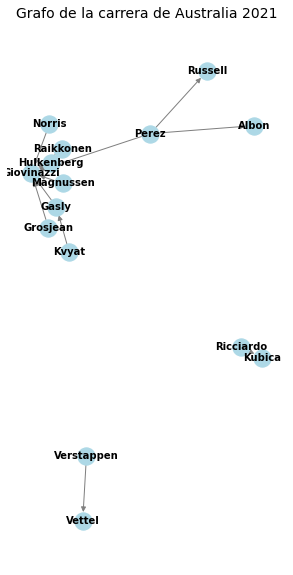

In [149]:
#CARRERA 2021 AUSTRALIA EJEMPLO
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Cargar solo la carrera de Australia del dataframe df2021
australia_2019 = df2019[df2019['Race'] == 'Australia']

# Crear el grafo
G = nx.DiGraph()

pilotos_2019 = australia_2019['Overtaker'].unique()
G.add_nodes_from(pilotos_2019)

for index, row in australia_2019.iterrows():
    G.add_edge(row['Overtaker'], row['Overtaken'])

centrality = nx.betweenness_centrality(G)

# Imprimir los nodos ordenados por su centralidad
print("Centralidad de los nodos:")
for node, centrality_value in centrality.items():
    print("El nodo {} tiene una centralidad intermedia de {}".format(node, centrality_value))

# Dibujar el grafo
plt.figure(figsize=(5, 10))

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=pos, with_labels=True, node_color='lightblue', edge_color='gray', font_size=10, font_weight='bold')

plt.title("Grafo de la carrera de Australia 2021", fontsize=14)
plt.axis('off')

plt.show()


El nodo Norris tiene una centralidad intermedia de 0.009687534687534688
El nodo Ricciardo tiene una centralidad intermedia de 0.009823290744343375
El nodo Giovinazzi tiene una centralidad intermedia de 0.020357960752697593
El nodo Russell tiene una centralidad intermedia de 0.013408134263397419
El nodo Perez tiene una centralidad intermedia de 0.016589258694521852
El nodo Bottas tiene una centralidad intermedia de 0.023022795917532757
El nodo Vettel tiene una centralidad intermedia de 0.035601116719537765
El nodo Tsunoda tiene una centralidad intermedia de 0.019420199683357578
El nodo Stroll tiene una centralidad intermedia de 0.014492189097452254
El nodo Leclerc tiene una centralidad intermedia de 0.012679323600376232
El nodo Ocon tiene una centralidad intermedia de 0.018504434162328897
El nodo Hamilton tiene una centralidad intermedia de 0.0102464786675313
El nodo Latifi tiene una centralidad intermedia de 0.05857721226142278
El nodo Alonso tiene una centralidad intermedia de 0.04953

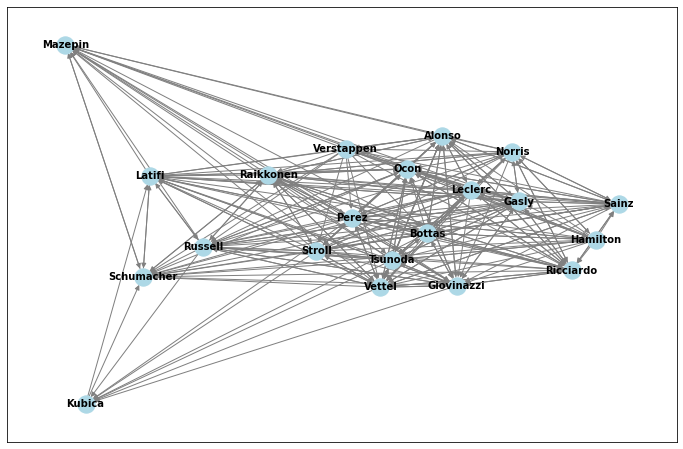

In [10]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.DiGraph()
pilotos_2021 = df2021['Overtaker'].unique()
G.add_nodes_from(pilotos_2021)

for index, row in df2021.iterrows():
    G.add_edge(row['Overtaker'], row['Overtaken'])


plt.figure(figsize=(12, 8))


pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=pos, with_labels=True, node_color='lightblue', edge_color='gray', font_size=10, font_weight='bold')
centrality = nx.betweenness_centrality(G)

for node, centrality_value in centrality.items():
    print("El nodo {} tiene una centralidad intermedia de {}".format(node, centrality_value))

plt.show()

In [12]:
import networkx as nx
import community

# Crear un grafo dirigido
DG = nx.DiGraph()

# Añadir los nodos al grafo
df = df2022
nodos = df['Overtaker'].unique()
DG.add_nodes_from(nodos)

# Añadir las aristas al grafo
for index, row in df.iterrows():
    adelantador = row['Overtaker']
    adelantado = row['Overtaken']
    if DG.has_edge(adelantador, adelantado):
        # Si la arista ya existe, se incrementa el peso de la misma
        DG[adelantador][adelantado]['weight'] += 1
    else:
        # Si la arista no existe, se crea una nueva arista con peso 1
        DG.add_edge(adelantador, adelantado, weight=1)

# Convertir el grafo dirigido en un grafo no dirigido
G = DG.to_undirected()

# Aplicar el algoritmo de Louvain
particiones = community.best_partition(G)

# Crear un diccionario de comunidades
comunidades = {}
for piloto, comunidad in particiones.items():
    if comunidad not in comunidades:
        comunidades[comunidad] = []
    comunidades[comunidad].append(piloto)

# Imprimir los pilotos agrupados por comunidad
for comunidad, pilotos in comunidades.items():
    print(f'Comunidad {comunidad}: {", ".join(pilotos)}')


Comunidad 0: Stroll, Zhou, Tsunoda, Hamilton, Alonso, Verstappen, Leclerc, De Vries
Comunidad 1: Perez, Russell, Bottas, Ricciardo, Ocon, Norris, Sainz, Hulkenberg
Comunidad 2: Latifi, Schumacher, Magnussen, Gasly, Albon, Vettel
